# Exploring and Preprocessing Data with Pandas and Scikit-Learn

## 1 Iris Dataset

In [1]:
# Load Iris dataset
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Name is a class, not a feature
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"])

## 1.1 Summary Statistics

Print the first 5 elements of your DataFrame using the command head(). How many features
are there and what are their types (e.g., numeric, nominal)?

In [2]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- There are 4 features ('Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width')
- All 4 of the features are numeric (cm measurements)

Compute and display summary statistics for each numeric feature available in the dataset.
These must include the minimum value, maximum value, mean, standard deviation, count, and
25:50:75% percentiles.

In [3]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 1.2 Data Visualization

Histograms: To illustrate the feature distributions, create a histogram for each numeric feature in the dataset. You may plot each histogram individually or combine them all into a single
plot. When generating histograms for this assignment, use the default number of bins.

In [4]:
sepal_length = df['Sepal Length']
sepal_length_hist = sepal_length.hist(color='r', alpha=0.6)

sepal_width = df['Sepal Width']
sepal__width_hist = sepal_width.hist(color='orange', alpha=0.5)

petal_length = df['Petal Length']
petal__length_hist = petal_length.hist(color='yellow', alpha=0.6)

petal_width = df['Petal Width']
petal_width_hist = petal_width.hist(color='g', alpha=0.4)

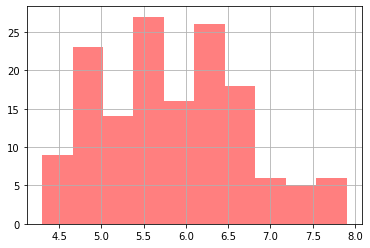

In [5]:
sepal_length = df['Sepal Length']
sepal_length_hist = sepal_length.hist(color='r', alpha=0.5)

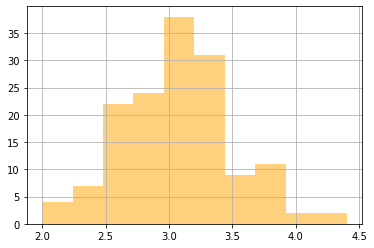

In [6]:
sepal_width = df['Sepal Width']
sepal__width_hist = sepal_width.hist(color='orange', alpha=0.5)

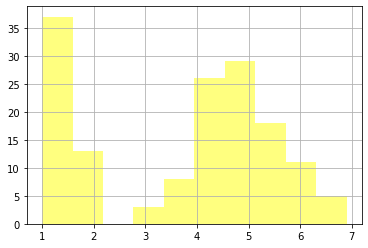

In [7]:
petal_length = df['Petal Length']
petal__length_hist = petal_length.hist(color='yellow', alpha=0.5)

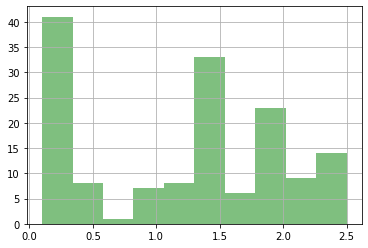

In [8]:
petal_width = df['Petal Width']
petal_width_hist = petal_width.hist(color='g', alpha=0.5)

Box Plots: To further assess the data, create a box plot for each numeric feature in the
dataset. All of the box plots will be combined into a single plot. 

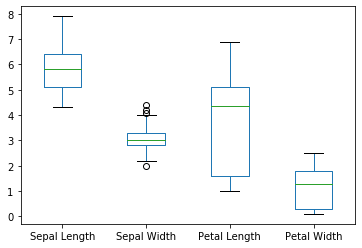

In [9]:
box = df.boxplot(grid=False, return_type='axes')

## 2 Ames, Iowa Housing Data

In [10]:
# Load Ames Housing dataset
import pandas as pd
pd.set_option("display.max_columns", 100)
url = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/AmesHousing.txt"
df = pd.read_csv(url, sep="\t")

## 2.1 Imputation

Identify and impute the features with missing values:

- How many features have missing values?

In [11]:
import numpy as np
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,

In [12]:
# Get the non-null count for each of the 82 columns, and convert the values to a list
non_nulls_list = df.count().values.tolist()
# Since there are 2930 rows, having 2930 non_nulls mean there are no nulls.
# So filter list based on non-null values less than 2930.
filtered_list = [i for i in non_nulls_list if i < 2930]
# The length of the filtered list is the number of features with null/missing values.
len(filtered_list)

27

- Fill each missing nominal feature value with the string “Missing”.

In [13]:
# First select only nominal features, then use fillna() (otherwise fillna() will alter numeric features)
nominal_cols = df.select_dtypes(exclude=np.number)
nominal_cols.fillna('Missing')

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,Missing,Missing,Missing,WD,Normal
1,RH,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,Missing,Gar2,WD,Normal
3,RL,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal
4,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Missing,Detchd,Unf,TA,TA,Y,Missing,GdPrv,Missing,WD,Normal
2926,RL,Pave,Missing,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
2927,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Missing,Missing,Missing,Missing,Missing,Y,Missing,MnPrv,Shed,WD,Normal
2928,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


- Interpolate each missing numeric feature value using linear interpolation.

In [33]:
# First select only numeric features
numeric_cols = df.select_dtypes(np.number)
numeric_cols

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.0,2.0,588.0,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,484.0,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.0,2.0,418.0,240,38,0,0,0,0,0,4,2006,170000


In [35]:
# Drop non-feature numeric cols
numeric_cols = numeric_cols.drop(['Order', 'PID'], axis=1)
numeric_cols

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.0,2.0,588.0,120,0,0,0,0,0,0,3,2006,142500
2926,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,484.0,164,0,0,0,0,0,0,6,2006,131000
2927,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,132000
2928,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.0,2.0,418.0,240,38,0,0,0,0,0,4,2006,170000


In [36]:
# Then interpolate
numeric_cols = numeric_cols.interpolate(method='linear')
numeric_cols

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.0,2.0,588.0,120,0,0,0,0,0,0,3,2006,142500
2926,20,49.5,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,484.0,164,0,0,0,0,0,0,6,2006,131000
2927,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1979.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,132000
2928,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.0,2.0,418.0,240,38,0,0,0,0,0,4,2006,170000


## 2.2. Standardization

- Standardize the imputed feature data so that the values of each numeric feature are standard normally distributed (i.e., each feature is Gaussian with zero mean and unit variance).

In [37]:
from sklearn import preprocessing

numeric_cols_scaled = preprocessing.scale(numeric_cols)
numeric_cols_scaled

array([[-0.87700484,  3.12874389,  2.74438073, ..., -0.44805744,
         1.678499  ,  0.42822875],
       [-0.87700484,  0.45972069,  0.18709726, ..., -0.07960156,
         1.678499  , -0.94895652],
       [-0.87700484,  0.50347517,  0.5228137 , ..., -0.07960156,
         1.678499  , -0.11012549],
       ...,
       [ 0.64771625, -0.32785993,  0.03719892, ...,  0.28885432,
        -1.36011828, -0.61092014],
       [-0.87700484,  0.32845726, -0.01750572, ..., -0.81651332,
        -1.36011828, -0.13516523],
       [ 0.06128506,  0.19719382, -0.06611797, ...,  1.76267783,
        -1.36011828,  0.09019236]])

- Visualize the results using box plots. How do the plots differ from box plots made before feature standardization? Which feature has the outlier furthest from the mean before and after standardization?

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe44795cf50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe44796db10>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fe44795c6d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe447974550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe447974a90>,
 'means': []}

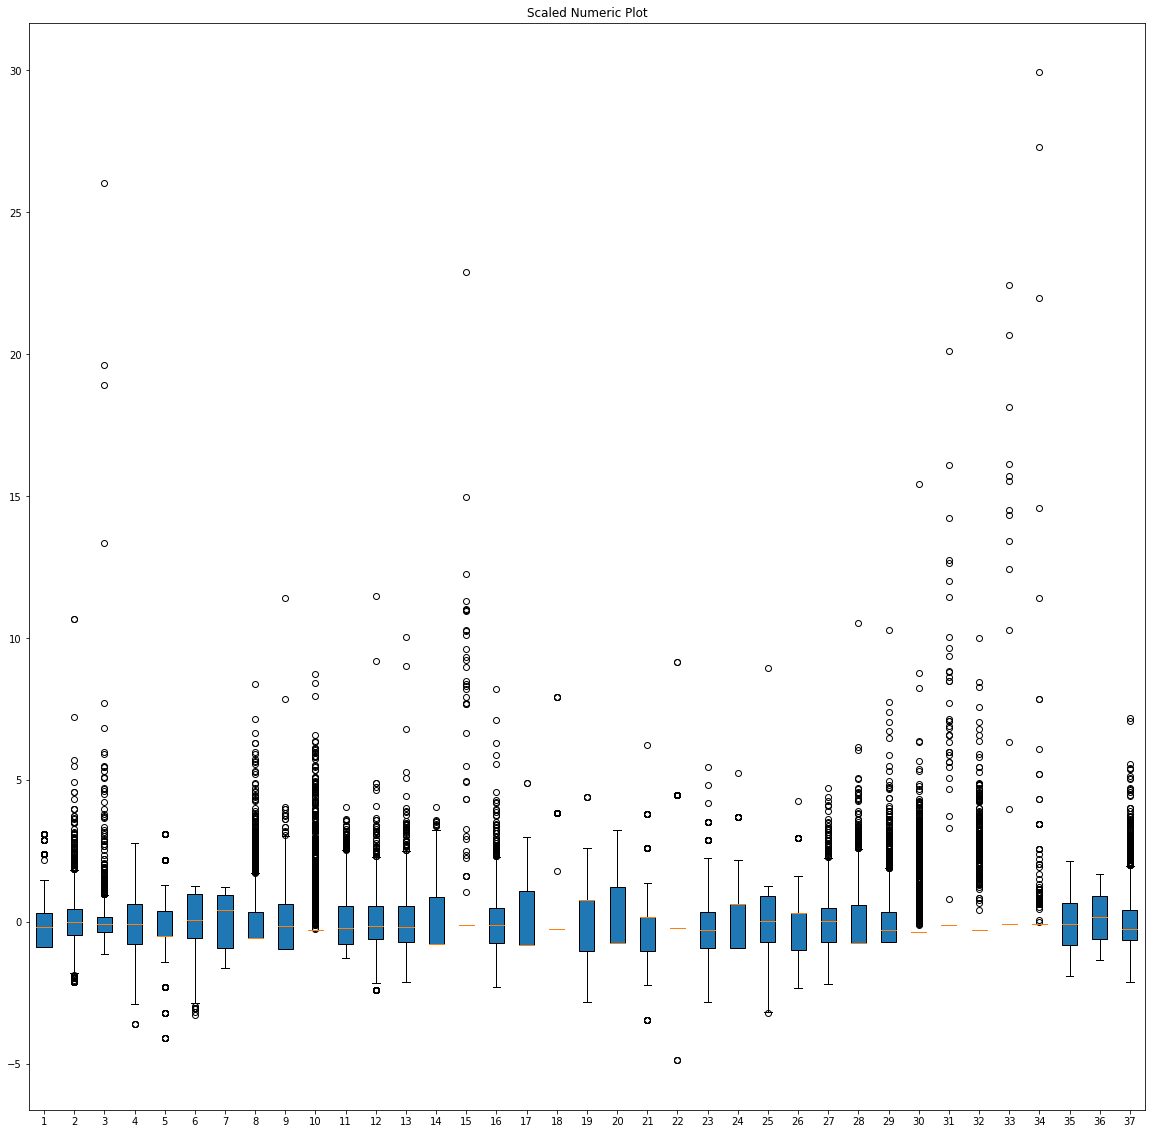

In [72]:
# Scaled Numeric Plot
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(20, 20))
x1 = numeric_cols_scaled

ax1.set_title('Scaled Numeric Plot')

ax1.boxplot(x1, patch_artist=True)

- Restating: How do the plots differ from box plots made before feature standardization? Which feature has the outlier furthest from the mean before and after standardization?

There were no box plots made before feature standardization, so I did that below. These scaled plots differ in that the medians are so similar. I didn't even need to drop features to have a decent visualization, whereas with the boxplots for unstandardized features are not easy to read - even after dropping a couple of large features.

Misc Val (34) has the outlier furtherst from the mean after standardization. Before standardization, it appears that SalePrice has the outlier furthest from the mean.

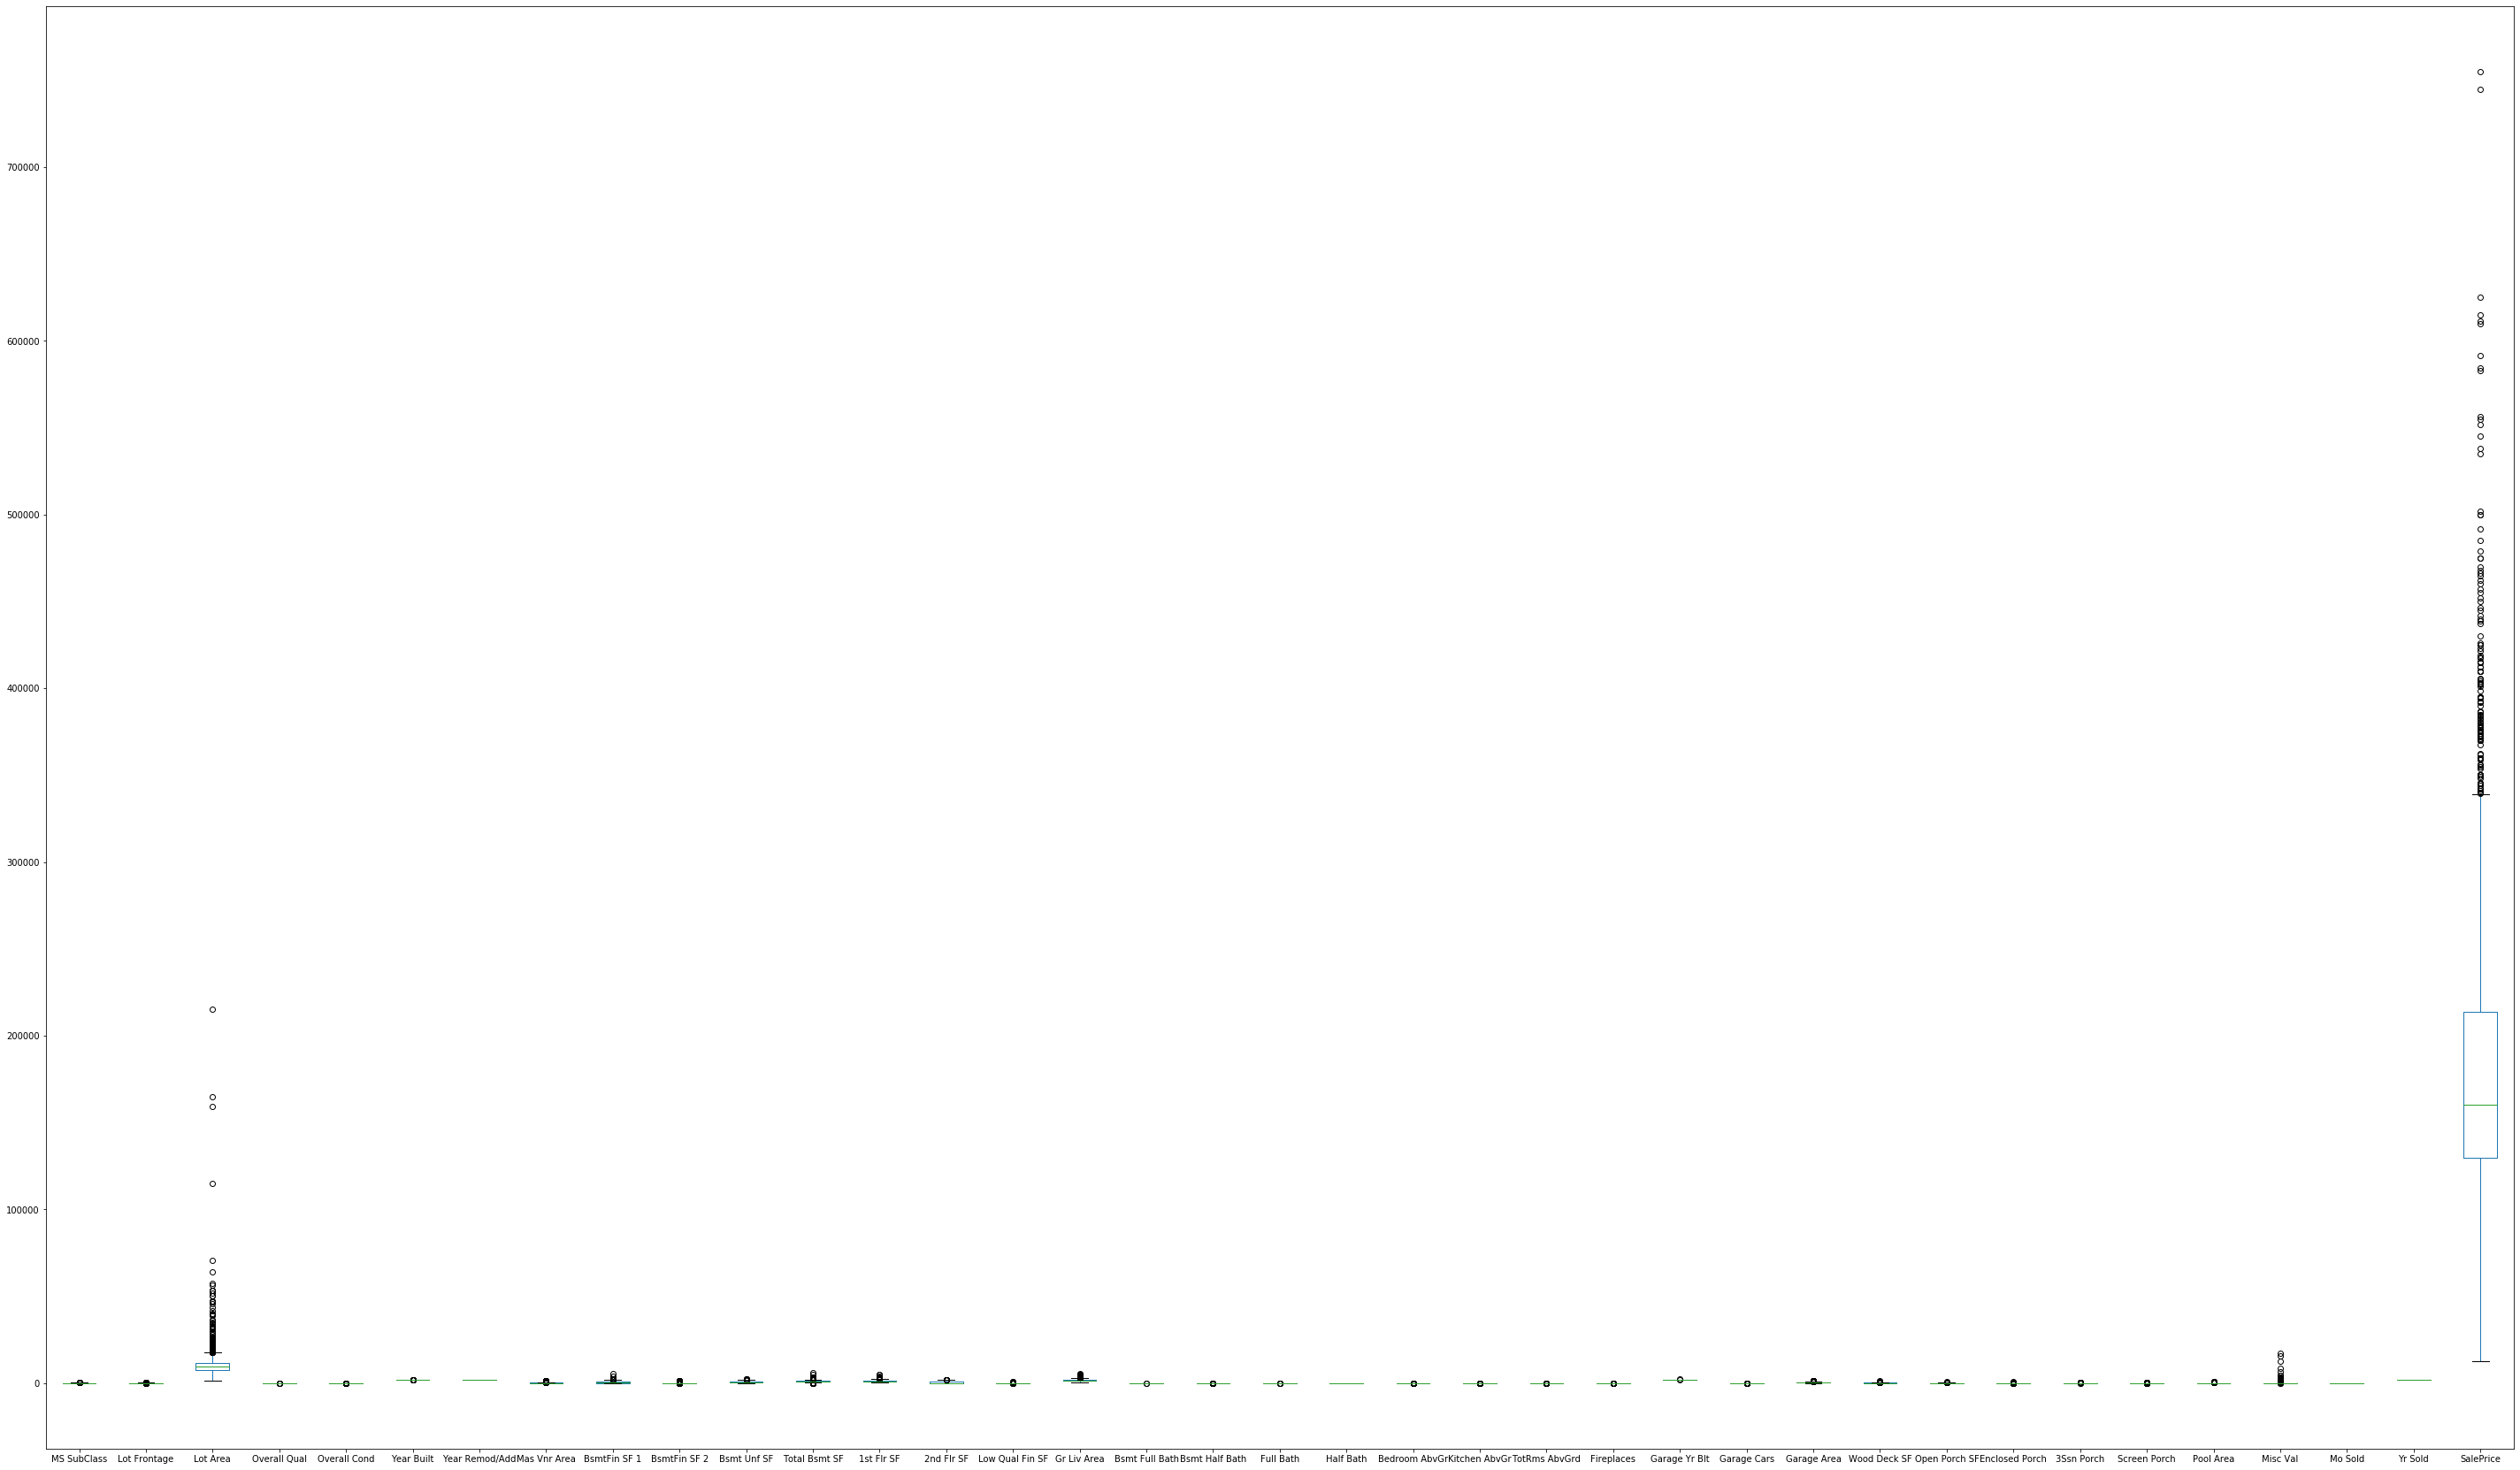

In [74]:
# Non-scaled Numeric Plot
numeric_cols.boxplot(grid=False, figsize=(50, 30))

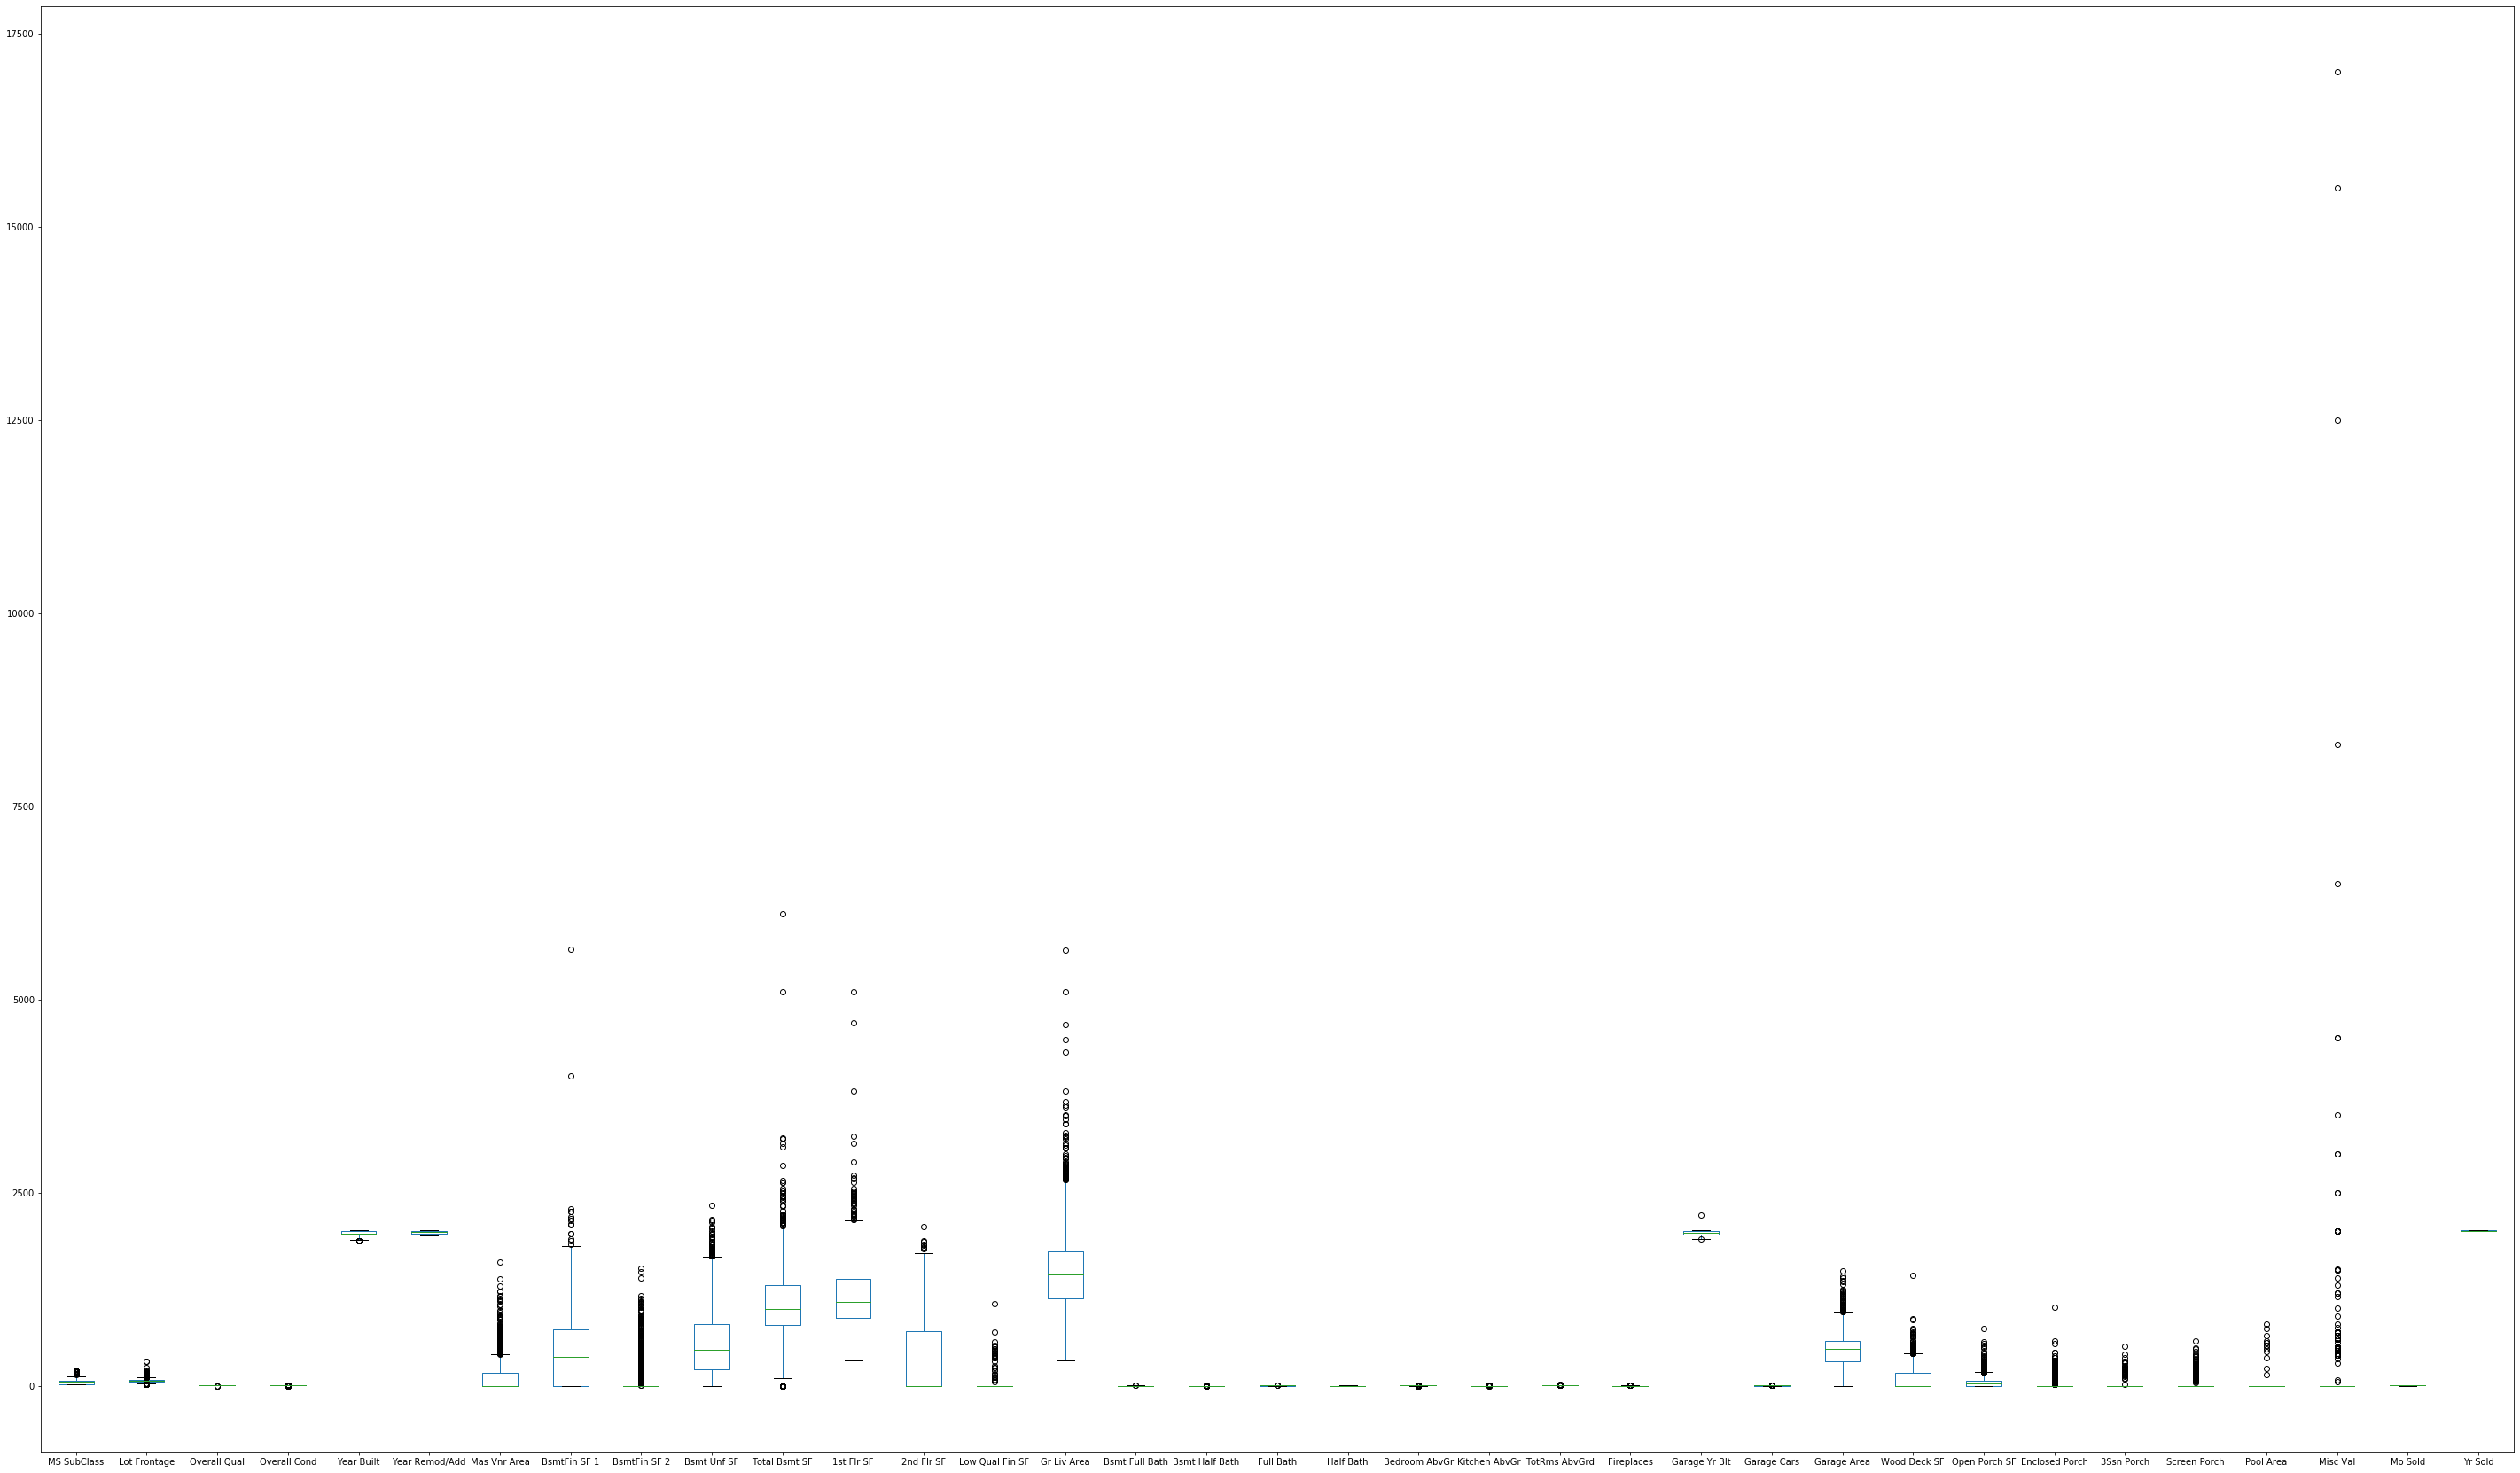

In [70]:
# Remove large SalePrice and Lot Area features for a clearer plot
numeric_cols_no_giants = numeric_cols.drop(['SalePrice', 'Lot Area'], axis=1)
numeric_cols_no_giants.boxplot(grid=False, figsize=(50, 30))

## 2.3 Feature Selection